In [8]:
import pandas as pd

In [9]:
df = pd.read_csv(r"C:\Users\admin\Downloads\clustervisitor.csv")

In [10]:
cluster = {"Young": (df['Age'] <= 30),"Middle": ((df['Age'] > 30) & (df['Age'] <= 50)),"Old": (df['Age'] > 50)}
print(cluster)

{'Young': 0      True
1     False
2      True
3     False
4      True
5     False
6      True
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29    False
Name: Age, dtype: bool, 'Middle': 0     False
1      True
2     False
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14    False
15     True
16    False
17    False
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27    False
28     True
29     True
Name: Age, dtype: bool, 'Old': 0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
1

In [11]:
count=[]
for g,c in cluster.items():
    visitors=df[c]
    count.append(len(visitors))
    print(f"visitors in {g} Group")
    print(visitors)
    print(count)

visitors in Young Group
    User_ID  Age  Gender      Location
0         1   25  Female      New York
2         3   22    Male       Chicago
4         5   30    Male         Miami
6         7   28  Female        Boston
11       12   27    Male        Austin
14       15   29  Female  Philadelphia
17       18   26    Male   Minneapolis
27       28   24  Female    Sacramento
[8]
visitors in Middle Group
    User_ID  Age  Gender         Location
1         2   40    Male      Los Angeles
5         6   45  Female    San Francisco
7         8   50    Male          Seattle
8         9   35    Male           Dallas
9        10   48  Female          Atlanta
10       11   33  Female  Washington D.C.
12       13   38    Male           Denver
13       14   42  Female          Phoenix
15       16   36    Male         Portland
18       19   31  Female        Charlotte
19       20   47    Male        San Diego
20       21   34    Male         San Jose
21       22   39  Female     Indianapolis
22      

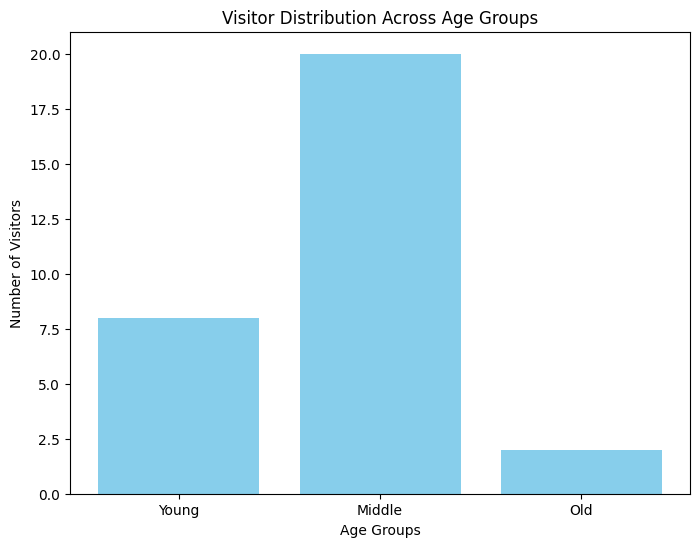

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(cluster.keys(),count, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Number of Visitors')
plt.title('Visitor Distribution Across Age Groups')
plt.show()

In [14]:
df = pd.read_csv(r"C:\Users\admin\Downloads\clustervisitor (Salary).csv")
df1 = df['Age']
df2 = df['Salary']
df3 = pd.concat([df1, df2], axis=1)
df3

,Age,Salary
0,25,25000
1,40,42000
2,22,22000
3,55,55000
4,30,30000
5,45,45000
6,28,28000
7,50,50000
8,35,35000
9,48,48000


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
sc=StandardScaler()
scaleddata=sc.fit_transform(df3)
print(scaleddata)

[[-1.41285731 -1.41630049]
 [ 0.27357715  0.48953922]
 [-1.7501442  -1.75262514]
 [ 1.9600116   1.94694606]
 [-0.85071249 -0.8557594 ]
 [ 0.83572196  0.82586387]
 [-1.07557042 -1.07997584]
 [ 1.39786678  1.38640497]
 [-0.28856767 -0.29521831]
 [ 1.17300886  1.16218853]
 [-0.5134256  -0.51943474]
 [-1.18799938 -1.19208405]
 [ 0.04871922  0.04110635]
 [ 0.49843507  0.48953922]
 [-0.96314146 -0.96786762]
 [-0.17613871 -0.18311009]
 [ 1.51029575  1.49851318]
 [-1.30042835 -1.30419227]
 [-0.73828353 -0.74365118]
 [ 1.06057989  1.05008031]
 [-0.40099664 -0.40732653]
 [ 0.16114818  0.15321456]
 [ 0.61086404  0.60164744]
 [-0.62585457 -0.63154296]
 [-0.06370975 -0.07100187]
 [ 0.723293    0.71375566]
 [ 1.28543782  1.27429675]
 [-1.52528628 -1.52840871]
 [ 0.38600611  0.377431  ]
 [ 0.94815093  0.93797209]]


In [21]:
Kmeans=KMeans(n_clusters=3,random_state=42)
df3['cluster']=Kmeans.fit_predict(df3)
df3

,Age,Salary,cluster
0,25,25000,0
1,40,42000,1
2,22,22000,0
3,55,55000,2
4,30,30000,0
5,45,45000,2
6,28,28000,0
7,50,50000,2
8,35,35000,1
9,48,48000,2


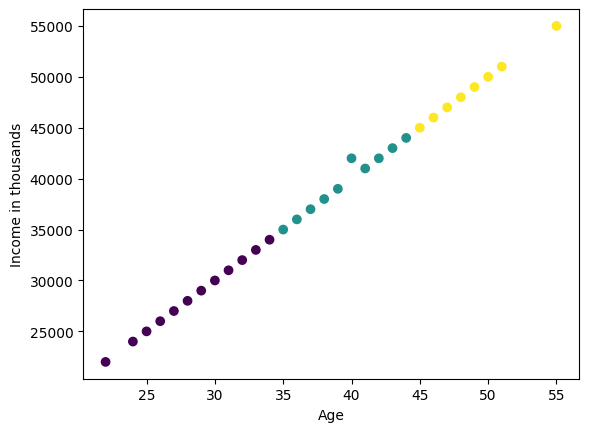

In [22]:
plt.scatter(df3 ['Age'], df3 ['Salary'],c=df3['cluster'])
plt.xlabel("Age")
plt.ylabel("Income in thousands")
plt.show()